In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('Travels.csv')

# Data Cleaning
* Handling Mixing Values

1.Handling missing values
2.Handling duplicates
3.Check datatype
4.Understand the dataset

In [5]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# Feature Engineering

In [6]:
#check the categories
print(df['Gender'].value_counts())
print('---------------')
print(df['MaritalStatus'].value_counts())
print('---------------')
print(df['TypeofContact'].value_counts())
print('---------------')
print(df['ProductPitched'].value_counts())
print('---------------')
print(df['Designation'].value_counts())
print('---------------')


Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64
---------------
MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64
---------------
TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64
---------------
ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64
---------------
Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64
---------------


In [7]:
df['Gender']=df['Gender'].replace('Fe Male','Female')

In [8]:
df['MaritalStatus']=df['MaritalStatus'].replace('SIngle','Unmarried')

In [9]:
#checking the missing values
#these features with nan values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5),'%missing values')

Age 4.62357 %missing values
TypeofContact 0.51146 %missing values
DurationOfPitch 5.13502 %missing values
NumberOfFollowups 0.92062 %missing values
PreferredPropertyStar 0.53191 %missing values
NumberOfTrips 2.86416 %missing values
NumberOfChildrenVisiting 1.35025 %missing values
MonthlyIncome 4.76678 %missing values


In [10]:
#statistics on numerical columns(NullColumns)
df[features_with_na].select_dtypes(exclude=object).describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

# Importin null values
* Impute median for Age
* Impute mode for TypeofContact
* Impute median for DurationOfPitch           
* Impute mode for NumberOfFollowups 
* Impute mode for PreferredPropertyStar     
* Impute median for NumberOfTrips             
* Impute mode for NumberOfChildrenVisiting  
* Impute median for MonthlyIncome             

In [12]:
#Age
df['Age'].fillna(df['Age'].median(), inplace=True)

#TypeofContact
df['TypeofContact'].fillna(df['TypeofContact'].mode()[0], inplace=True)

#DurationOfPitch
df['DurationOfPitch'].fillna(df['DurationOfPitch'].median(), inplace=True)

#NumberOfFollowups
df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mode()[0], inplace=True)

#PreferredPropertyStar
df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0], inplace=True)

#NumberOfTrips
df['NumberOfTrips'].fillna(df['NumberOfTrips'].median(), inplace=True)

#NumberOfChildrenVisiting
df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].mode()[0], inplace=True)

#MonthlyIncome
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)

# Median was used for numeric / continuous feature
# Mode was used for categorical / discrete feature [0]
# - .mode() → returns a Series of one or more most frequent values.
# - [0] → selects the first one from that Series


In [13]:
df.head()
df.isnull().sum() #no missing values remaind and was replaces

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [14]:
df.drop('CustomerID',inplace=True,axis=1)

In [15]:
#Feature Engineering
#create a new column for features
df['TotalVisitings']=df['NumberOfChildrenVisiting']+df['NumberOfPersonVisiting']
df.drop(columns=['NumberOfChildrenVisiting','NumberOfPersonVisiting'])

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisitings
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,Manager,26576.0,4.0
4884,1,28.0,Company Invited,1,31.0,Salaried,Male,5.0,Basic,3.0,Single,3.0,1,3,1,Executive,21212.0,6.0
4885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4.0,Standard,4.0,Married,7.0,0,1,1,Senior Manager,31820.0,7.0
4886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,4.0,Basic,3.0,Single,3.0,0,5,0,Executive,20289.0,5.0


In [16]:
#get all numeric features
num_features=[feature for feature in df.columns if df[feature].dtype!=object]
print('Number of numerical features',len(num_features))

#categorical feauters
cat_features=[feature for feature in df.columns if df[feature].dtype==object]
print('Number of categorical features',len(cat_features))

#discrete features
dis_features=[feature for feature in num_features if df[feature].nunique() <= 25]
print('Number of discrete features',len(dis_features))

#continuos feauters
cont_features = [feature for feature in num_features if feature not in dis_features]
print('Number of continuous features', len(cont_features))

Number of numerical features 14
Number of categorical features 6
Number of discrete features 11
Number of continuous features 3


In [17]:
#I/P D/P features
X=df.drop(['ProdTaken'],axis=1)
y=df['ProdTaken']
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,TotalVisitings
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,2.0


In [18]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

* Column transformer is a tool in sklearn that let you apply different preprocessing steps to different columns of
* your datasets all in a streamlined pipeline

In [19]:
#create column transformer with 3 types of transformer
cat_features=X.select_dtypes(include=object).columns
num_features=X.select_dtypes(exclude=object).columns

In [20]:
# - Categorical → usually encoded (like OneHotEncoder).
# - Numerical → usually scaled or imputed (like StandardScaler, median fill)

In [21]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder(drop='first')

preprocessor=ColumnTransformer([
    ('OneHotEncoder',oh_transformer,cat_features),
    ('StandardScaler',numeric_transformer,num_features)
])

In [23]:
#appplying tranformation in training and testing
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [25]:
pd.DataFrame(X_train) #onehotencoding and standard scaler applyied to everything in the dataset

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-1.252472,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.218050,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.129347,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,0.956297,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.129347,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.218050,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.129347,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,-0.218050,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.511165,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,2.130645,-0.024889,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.129347,1.284279,-0.725271,-0.674182,-0.632399,-1.506426,0.782966,0.956297,-0.536973,0.643615
3906,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.129347,-0.718725,1.771041,-1.220627,-0.632399,1.408395,0.782966,-0.218050,1.529609,-0.065268
3907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.129347,0.282777,-0.725271,2.058043,-0.632399,-0.777720,0.782966,0.956297,-0.360576,0.643615
3908,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.129347,1.284279,-0.725271,-0.127737,-0.632399,-1.506426,0.782966,0.956297,-0.252799,0.643615


# Model Training step

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,confusion_matrix,f1_score,precision_score,recall_score

In [47]:
models={
    'RandomForestClassifier':RandomForestClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'LogisticRegression':LogisticRegression()
}

for i in range(len(list(models))):
    model=list(models.values())[i] #iterating through model names
    model.fit(X_train,y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    y_test_proba=model.predict_proba(X_test)[:,1]
    y_train_proba=model.predict_proba(X_train)[:,1]

    model_train_accuracy= accuracy_score(y_train, y_train_pred)
    model_train_f1_score=f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision=precision_score(y_train, y_train_pred)
    model_train_confusion=confusion_matrix(y_train, y_train_pred)
    model_train_classificaion=classification_report(y_train, y_train_pred)
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_roc_auc=roc_auc_score(y_train,y_train_proba)

    model_test_accuracy= accuracy_score(y_test, y_test_pred)
    model_test_f1_score=f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision=precision_score(y_test, y_test_pred)
    model_test_confusion=confusion_matrix(y_test, y_test_pred)
    model_test_classificaion=classification_report(y_test, y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_roc_auc=roc_auc_score(y_test,y_test_proba)

    print(list(models.keys())[i]) #printing the model name with metricsx
    
    print('Model program for Training Set')
    print('Accuracy:{:.4f}'.format(model_train_accuracy))
    print('f1_score:{:.4f}'.format(model_train_f1_score))
    print('precision:{:.4f}'.format(model_train_precision))
    print('recall:{:.4f}'.format(model_train_recall))
    print('roc_auc:{:.4f}'.format(model_train_roc_auc))
    print('-----------------------')
    print('Model program for Testing Set')
    print('Accuracy:{:.4f}'.format(model_test_accuracy))
    print('f1_score:{:.4f}'.format(model_test_f1_score))
    print('precision:{:.4f}'.format(model_test_precision))
    print('recall:{:.4f}'.format(model_test_recall))
    print('roc_auc:{:.4f}'.format(model_test_roc_auc))
    print('='*35)
    print('\n')


RandomForestClassifier
Model program for Training Set
Accuracy:1.0000
f1_score:1.0000
precision:1.0000
recall:1.0000
roc_auc:1.0000
-----------------------
Model program for Testing Set
Accuracy:0.9121
f1_score:0.9038
precision:0.9412
recall:0.5864
roc_auc:0.9702


DecisionTreeClassifier
Model program for Training Set
Accuracy:1.0000
f1_score:1.0000
precision:1.0000
recall:1.0000
roc_auc:1.0000
-----------------------
Model program for Testing Set
Accuracy:0.8978
f1_score:0.8971
precision:0.7459
recall:0.7225
roc_auc:0.8314


LogisticRegression
Model program for Training Set
Accuracy:0.8460
f1_score:0.8211
precision:0.6954
recall:0.3100
roc_auc:0.8141
-----------------------
Model program for Testing Set
Accuracy:0.8344
f1_score:0.8078
precision:0.6706
recall:0.2984
roc_auc:0.8043




#### Hyperparameter tuning

In [49]:
# Random Forest
rf_param={
    'max_depth':[5,8,15,None,10],
    'max_features':[5,7,'auto',8],
    'min_samples_split':[2,8,15,20],
    'n_estimators':[100,200,500,1000]
}

# Logistic Regression
lr_param={
    'penalty':['l1','l2','elasticnet','none'],
    'C':[0.01,0.1,1,10,100],
    'solver':['lbfgs','liblinear','saga','newton-cg'],
    'class_weight':[None,'balanced']
}

# Decision Tree
dt_param={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[None,5,10,15,20],
    'min_samples_split':[2,5,10,20],
    'max_features':[None,'sqrt','log2']
}

In [51]:
randomcv_models=[
    ('RF',RandomForestClassifier(),rf_param),
    ('LR',LogisticRegression(),lr_param),
    ('DT',DecisionTreeClassifier(),dt_param)
]

In [53]:
#RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
model_params={}

for name,model,params in randomcv_models:
    random=RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=100,
        cv=3,
        n_jobs=-1)
    random.fit(X_train,y_train)
    model_params[name]=random.best_params_


for model_name in model_params:
    print(f'--------Best params for {model_name}')
    print(model_params[model_name])

--------Best params for RF
{'n_estimators': 100, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}
--------Best params for LR
{'solver': 'saga', 'penalty': 'l1', 'class_weight': None, 'C': 0.1}
--------Best params for DT
{'splitter': 'random', 'min_samples_split': 2, 'max_features': None, 'max_depth': 15, 'criterion': 'gini'}


In [57]:
#Using best params and trainig the mode again

models={
    'RandomForestClassifier':RandomForestClassifier(
        n_estimators=100,
        min_samples_split=2,
        max_features=8, 
        max_depth=None
    ),
    'DecisionTreeClassifier':DecisionTreeClassifier(
        splitter='random',
        min_samples_split=2,
        max_features=None,
        max_depth=15, 
        criterion='gini'
    ),
    'LogisticRegression':LogisticRegression(
        solver='saga',
        penalty='l1',
        class_weight=None,
        C=0.1
    )
}

for i in range(len(list(models))):
    model=list(models.values())[i] #iterating through model names
    model.fit(X_train,y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    y_test_proba=model.predict_proba(X_test)[:,1]
    y_train_proba=model.predict_proba(X_train)[:,1]

    model_train_accuracy= accuracy_score(y_train, y_train_pred)
    model_train_f1_score=f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision=precision_score(y_train, y_train_pred)
    model_train_confusion=confusion_matrix(y_train, y_train_pred)
    model_train_classificaion=classification_report(y_train, y_train_pred)
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_roc_auc=roc_auc_score(y_train,y_train_proba)

    model_test_accuracy= accuracy_score(y_test, y_test_pred)
    model_test_f1_score=f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision=precision_score(y_test, y_test_pred)
    model_test_confusion=confusion_matrix(y_test, y_test_pred)
    model_test_classificaion=classification_report(y_test, y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_roc_auc=roc_auc_score(y_test,y_test_proba)

    print(list(models.keys())[i]) #printing the model name with metricsx
    
    print('Model program for Training Set')
    print('Accuracy:{:.4f}'.format(model_train_accuracy))
    print('f1_score:{:.4f}'.format(model_train_f1_score))
    print('precision:{:.4f}'.format(model_train_precision))
    print('recall:{:.4f}'.format(model_train_recall))
    print('roc_auc:{:.4f}'.format(model_train_roc_auc))
    print('WITH BEST PARAMS')

    print('-----------------------')
    
    print('Model program for Testing Set')
    print('Accuracy:{:.4f}'.format(model_test_accuracy))
    print('f1_score:{:.4f}'.format(model_test_f1_score))
    print('precision:{:.4f}'.format(model_test_precision))
    print('recall:{:.4f}'.format(model_test_recall))
    print('roc_auc:{:.4f}'.format(model_test_roc_auc))
    print('WITH BEST PARAMS')

    print('='*35)
    print('\n')


RandomForestClassifier
Model program for Training Set
Accuracy:1.0000
f1_score:1.0000
precision:1.0000
recall:1.0000
roc_auc:1.0000
WITH BEST PARAMS
-----------------------
Model program for Testing Set
Accuracy:0.9305
f1_score:0.9253
precision:0.9695
recall:0.6649
roc_auc:0.9716
WITH BEST PARAMS


DecisionTreeClassifier
Model program for Training Set
Accuracy:0.9928
f1_score:0.9928
precision:0.9986
recall:0.9630
roc_auc:0.9992
WITH BEST PARAMS
-----------------------
Model program for Testing Set
Accuracy:0.8896
f1_score:0.8864
precision:0.7515
recall:0.6492
roc_auc:0.8004
WITH BEST PARAMS


LogisticRegression
Model program for Training Set
Accuracy:0.8471
f1_score:0.8159
precision:0.7529
recall:0.2675
roc_auc:0.8102
WITH BEST PARAMS
-----------------------
Model program for Testing Set
Accuracy:0.8313
f1_score:0.7999
precision:0.6757
recall:0.2618
roc_auc:0.7980
WITH BEST PARAMS




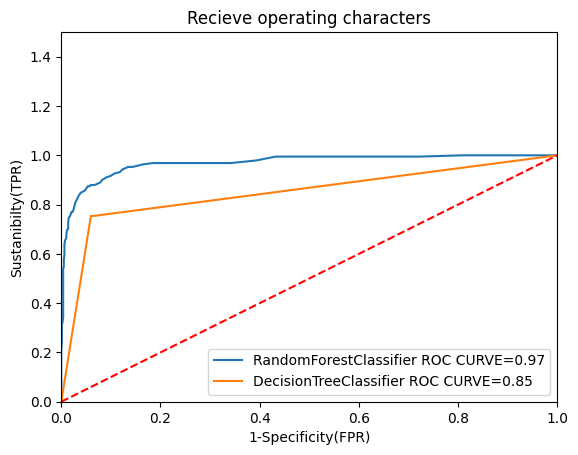

In [ ]:
#Plot ROC AUC curve
plt.figure()
#add the models to the list that you want to view on the roc plot
auc_models=[{
    'label':'RandomForestClassifier',
    'model':RandomForestClassifier(
        n_estimators=100,
        min_samples_split=2,
        max_features=8, 
        max_depth=None
    ),
    'auc':0.9716
},
{
    'label':'DecisionTreeClassifier',
    'model':DecisionTreeClassifier(
        splitter='random',
        min_samples_split=2,
        max_features=None,
        max_depth=15
    ),
    'auc':0.8004
},
]

#create lopp thoruvgh all model
for algo in auc_models:
    model=algo['model']
    model.fit(X_train,y_train)
    fpr,tpr,thresholds=roc_curve(y_test,model.predict_proba(X_test)[:,1])
    plt.plot(fpr,tpr,label='%s ROC CURVE=%0.2f' % (algo['label'],roc_auc_score(y_test,model.predict_proba(X_test)[:,1])))

#custom settings for plot
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.5])

plt.xlabel('1-Specificity(FPR)')
plt.ylabel('Sustanibilty(TPR)')
plt.title('Recieve operating characters')

plt.legend(loc='lower right')
plt.savefig('auc.png')
plt.show()